In [1]:
import sys
sys.path.append('./../')
import spineSimulator
from spineSimulator import plot

import copy
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import numpy as np

In [2]:
#spineSimulator.run(81)

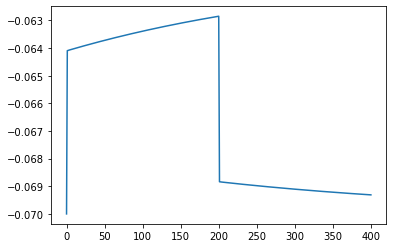

In [3]:
file_id = 'experiment_103'
(x,
a,
t,
phi,
c_Na,
c_K,
c_Cl,
param_set,
params,
dx,
dt,
r_Na,
R_Na,
g_Na_ij,
r_K,
R_K,
g_K_ij,
r_Cl,
R_Cl,
g_Cl_ij,
r_e,
R_e,
g_ij,
i_c_Na,
i_c_K,
i_c_Cl,
i_e_Na,
i_e_K,
i_e_Cl,
i_e,
i_c,
i_total,
) = plot.get_results_summary(file_id)

plt.plot(phi[:,1])

# Spatial discretication

The spine geometry consists of cylindical segemnts. All segment in the head have the same radius. Segments of the neck and the shaft have a different radius. There is a sharp change of the radius between head and neck but also between neck and shaft. This leads to discretization effects as the spatial derivatives are computed based on value of neighbouring segments.

$x[i]$ are the central points of the segments along the spine. There are $N$ segments. $L$ is the distance between the center of first and last segemnt, x[N] - x[1] = L. The effective length of the spine $L_{eff}$ is  $L_{eff}= L/(N-1)*N$ as $x[i]$ are the central points of the segments and the is an additional half first and last segment .
If the number of segments is reduced and $L_{eff}$ has to remain unchanged $L$ (simulation parameters) has to be adjusted


In [4]:
l_eff = 1.3928571428571428e-6 # 1.4e-6#
sim_id = list(range(94,100))
for i,n_domain in enumerate(list(range(1,7))):
    dx = l_eff/(3.*n_domain)
    xi = np.arange(0.5*dx, l_eff, dx)
    print('sim_id, n_domain, l:',sim_id[i], n_domain, xi[-1]-xi[0])

sim_id, n_domain, l: 94 1 9.285714285714287e-07
sim_id, n_domain, l: 95 2 1.1607142857142857e-06
sim_id, n_domain, l: 96 3 1.2380952380952382e-06
sim_id, n_domain, l: 97 4 1.2767857142857142e-06
sim_id, n_domain, l: 98 5 1.2999999999999996e-06
sim_id, n_domain, l: 99 6 1.3154761904761907e-06


### Charging of capacitor as function of time for different spatial discretizations

In [5]:
# ids  94-99 10 \mu s
# 199-204 20 ms
runs_10ms_xdiscr = [str(i) for i in range(199,205)]
runs_10mus_xdiscr = [str(i) for i in range(94,100)]

phi_head_10ms_xdiscr = []
phi_head_10mus_xdiscr = []
cum_resistance_10mus_xdiscr = []
i_neck_10mus_xdiscr = []
t_10ms_xdiscr = []
t_10mus_xdiscr = []
c_Na_10ms_xdiscr = []
c_K_10ms_xdiscr = []
c_Cl_10ms_xdiscr = []


for i in runs_10mus_xdiscr:
    file_id = 'experiment_'+i
    (x,
    a,
    t,
    phi,
    c_Na,
    c_K,
    c_Cl,
    param_set,
    params,
    dx,
    dt,
    r_Na,
    R_Na,
    g_Na_ij,
    r_K,
    R_K,
    g_K_ij,
    r_Cl,
    R_Cl,
    g_Cl_ij,
    r_e,
    R_e,
    g_ij,
    i_c_Na,
    i_c_K,
    i_c_Cl,
    i_e_Na,
    i_e_K,
    i_e_Cl,
    i_e,
    i_c,
    i_total,
    ) = plot.get_results_summary(file_id)
    phi_head_10mus_xdiscr.append(phi)
    t_10mus_xdiscr.append(t)
    i_neck_10mus_xdiscr.append(i_total)
    cum_resistance_10mus_xdiscr.append(g_ij)
    #print(np.sum(np.concatenate(([0.5*g_ij[0,0]],g_ij[0,1:-1],[0.5*g_ij[0,-1]]))))
    #ni = int((len(x)-2)/3)
    #print(ni, (x[0,1+ni:1+ni+ni])
    #print('################')
    #print(np.max(t))
    #print(dx*ni)
    
    
for i in runs_10ms_xdiscr:
    file_id = 'experiment_'+i
    (x,
    a,
    t,
    phi,
    c_Na,
    c_K,
    c_Cl,
    param_set,
    params,
    dx,
    dt,
    r_Na,
    R_Na,
    g_Na_ij,
    r_K,
    R_K,
    g_K_ij,
    r_Cl,
    R_Cl,
    g_Cl_ij,
    r_e,
    R_e,
    g_ij,
    i_c_Na,
    i_c_K,
    i_c_Cl,
    i_e_Na,
    i_e_K,
    i_e_Cl,
    i_e,
    i_c,
    i_total,
    ) = plot.get_results_summary(file_id)
    phi_head_10ms_xdiscr.append(phi)
    c_Na_10ms_xdiscr.append(c_Na)
    c_K_10ms_xdiscr.append(c_K)
    c_Cl_10ms_xdiscr.append(c_Cl)
    t_10ms_xdiscr.append(t)
    #print(np.sum(np.concatenate(([0.5*g_ij[0,0]],g_ij[0,1:-1],[0.5*g_ij[0,-1]]))))
    #ni = int((len(x)-2)/3)
    #print(ni, (x[0,1+ni:1+ni+ni])
    #print('################')
    #print(np.max(t))
    #print(dx*ni)
    #t_10ms = t



1
IIIIIIIIII 2.4943912021206374e-11
2
IIIIIIIIII 2.4942844233010045e-11
3
IIIIIIIIII 2.494251834032142e-11
4
IIIIIIIIII 2.4942372830483932e-11
5
IIIIIIIIII 2.4942292149725948e-11
6
IIIIIIIIII 2.4942240570870884e-11


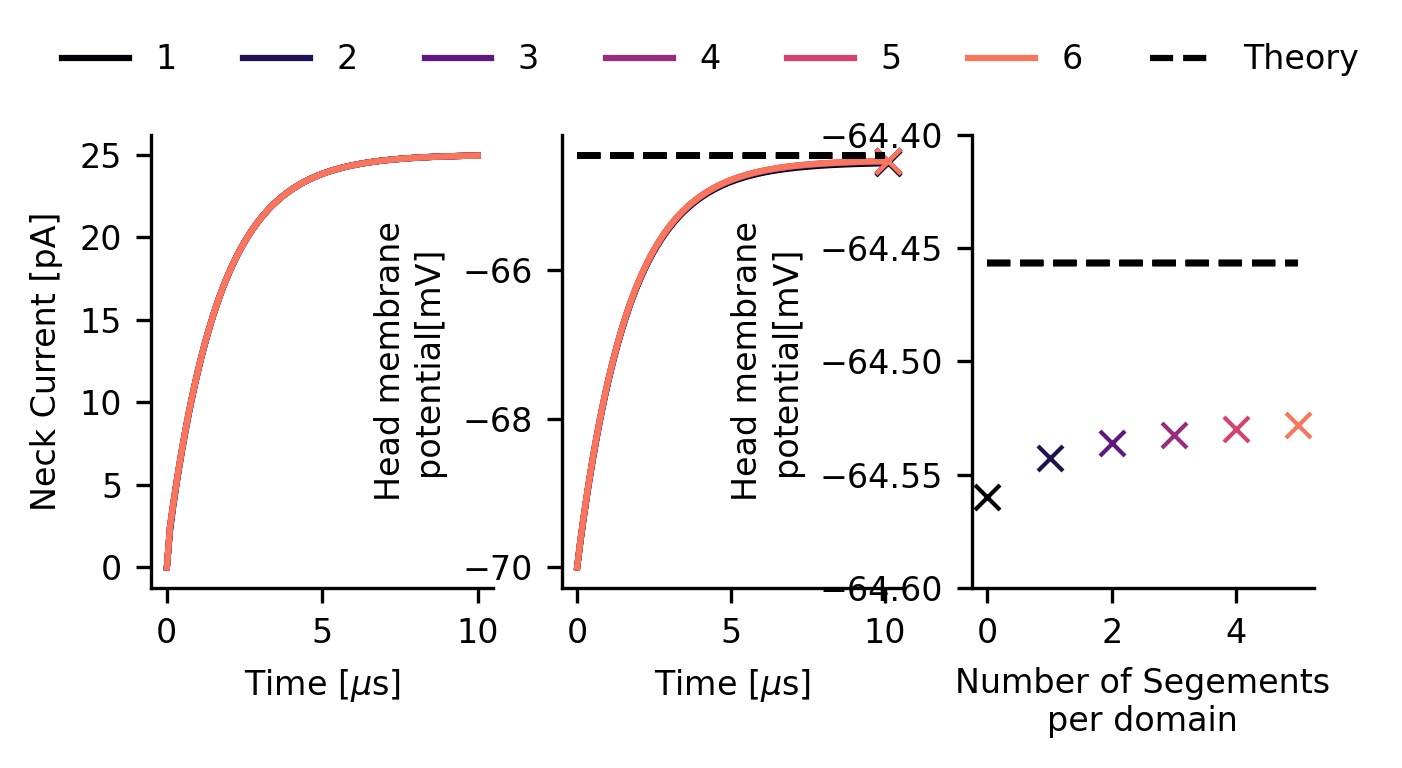

In [7]:

colors = ['r', 'g', 'b', 'c', 'k', 'y']
colors = [cmx.magma(1./7*n) for n in range(6)] 

fig = plt.figure(dpi=300, figsize=(5,2))
ax0 = fig.add_subplot(131)
ax1 = fig.add_subplot(132)
ax2 = fig.add_subplot(133)
ti_max = 101
for n, phi in enumerate(phi_head_10mus_xdiscr):
    t = t_10mus_xdiscr[n]
    i = runs_10mus_xdiscr
    n_segments = int((np.shape(phi)[1]-2)/3)
    print(n_segments)
    i_total = i_neck_10mus_xdiscr[n]
    print('IIIIIIIIII',i_total[ti_max,n+1])
    
    g_ij = cum_resistance_10mus_xdiscr[0]
    cum_R = np.cumsum(1./g_ij, axis=1)
    v_lim = cum_R[:,-1]*i_total[ti_max,-1]+phi[0,0]
    
    
    
    #print(t)
    ax0.plot(t[:ti_max]*1.e6,i_total[:ti_max,n+1]*1.e12, color=colors[n])
    ax0.set_ylabel('Neck Current [pA]', fontsize=8)
    ax0.set_xlabel('Time [$\mu$s]', fontsize=8)
    ax0.tick_params(labelsize=8)
    ax0.spines['top'].set_visible(False)
    ax0.spines['right'].set_visible(False)
    
    
    ax1.plot(t[:ti_max]*1.e6,phi[:ti_max,1]*1.e3, label=n_segments, color=colors[n])
    ax1.plot([t[ti_max]*1.e6],phi[ti_max,1]*1.e3, marker = 'x', color=colors[n]) 
    if n == len(phi_head_10mus_xdiscr)-1:
        ax1.plot(t[:ti_max]*1.e6,v_lim[:ti_max]*1.e3,'k--',zorder=10, label='Theory')
    else: # no label
        ax1.plot(t[:ti_max]*1.e6,v_lim[:ti_max]*1.e3,'k--',zorder=10)
    ax1.set_ylabel('Head membrane\npotential[mV]', fontsize=8)
    ax1.set_xlabel('Time [$\mu$s]', fontsize=8)
    ax1.tick_params(labelsize=8)
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)

    
    ax2.plot([0,len(phi_head_10mus_xdiscr)-1],[v_lim[0]*1.e3,v_lim[0]*1.e3],'k--',zorder=10)
    ax2.plot([n],phi[ti_max,1]*1.e3, marker = 'x', color=colors[n]) 
    ax2.set_ylabel('Head membrane\npotential[mV]', fontsize=8)
    ax2.set_xlabel('Number of Segements\nper domain', fontsize=8)
    ax2.tick_params(labelsize=8)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.set_ylim(-64.6, -64.4)
    
    
ax1.legend(fontsize=8, ncol=7, loc=(-1.5,1.1), frameon=False)
#plt.tight_layout()
plt.show()

### Diffusion effects (10 ms)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1.0
2.0
3.0
4.0
5.0
6.0


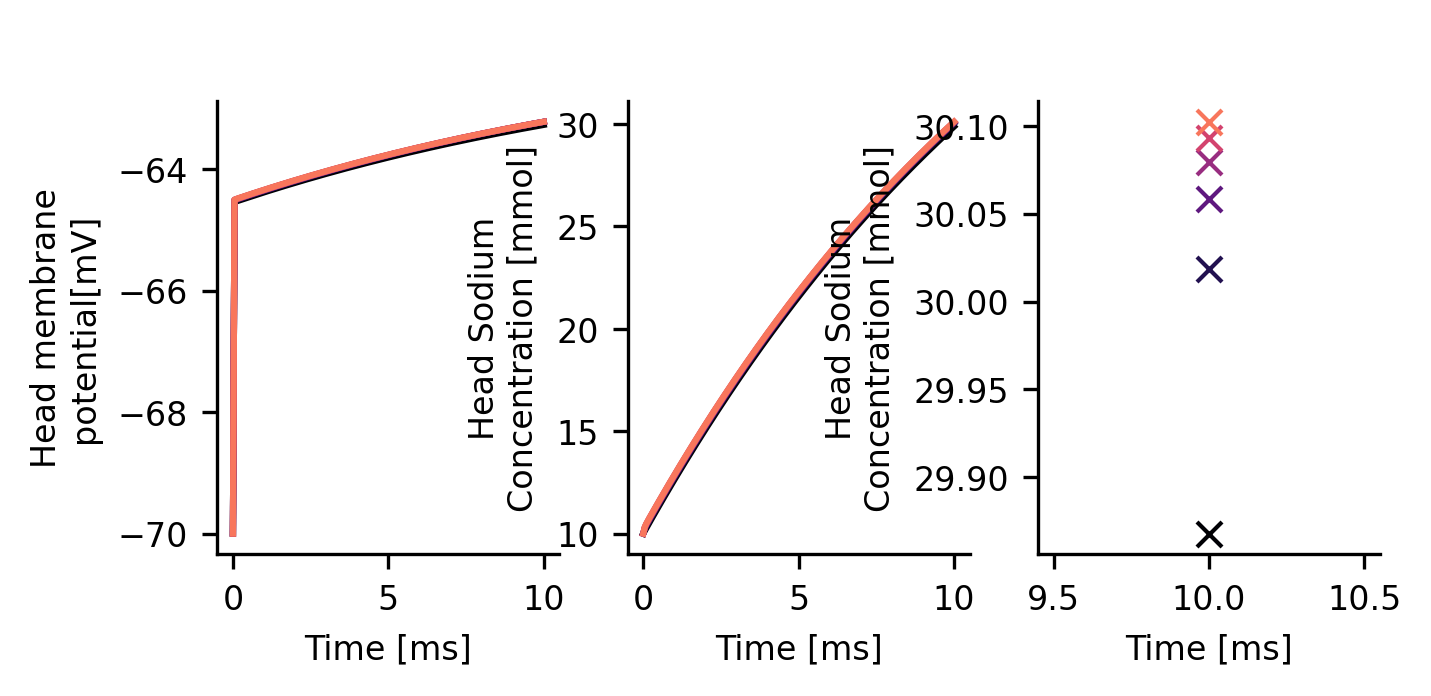

In [8]:

fig = plt.figure(dpi=300, figsize=(5,2))
ax0 = fig.add_subplot(131)
ax1 = fig.add_subplot(132)
ax2 = fig.add_subplot(133)


for n, phi in enumerate(phi_head_10ms_xdiscr):
    i = runs_10ms_xdiscr
    n_segments = (np.shape(phi)[1]-2)/3
    print(n_segments)
    t = t_10ms_xdiscr[n]
    c_Na = c_Na_10ms_xdiscr[n]
    c_K = c_K_10ms_xdiscr[n]
    c_Cl = c_Cl_10ms_xdiscr[n]

    
    ax0.plot(t*1.e3,phi[:,1]*1.e3, color=colors[n])
    ax0.set_ylabel('Head membrane\npotential[mV]', fontsize=8)
    ax0.set_xlabel('Time [ms]', fontsize=8)
    ax0.tick_params(labelsize=8)
    ax0.spines['top'].set_visible(False)
    ax0.spines['right'].set_visible(False)
    
    
    ax1.plot(t*1.e3,c_Na[:,1], color=colors[n])
    ax1.set_ylabel('Head Sodium\nConcentration [mmol]', fontsize=8)
    ax1.set_xlabel('Time [ms]', fontsize=8)
    ax1.tick_params(labelsize=8)
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)

    
    ax2.plot([t[-1]*1.e3],[c_Na[-1,1]],marker='x', color=colors[n])
    ax2.set_ylabel('Head Sodium\nConcentration [mmol]', fontsize=8)
    ax2.set_xlabel('Time [ms]', fontsize=8)
    ax2.tick_params(labelsize=8)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    
    
ax1.legend(fontsize=8, ncol=6, loc=(-1.5,1.1), frameon=False)
#plt.tight_layout()
plt.show()

# Temporal discretization

The equation is stiff. Stibility of the numerical solution can be achieved by taking the time steps sufficiently small. Here we evaluate the numerical solution for different values of $\Delta t$. Stability was analyzed for 5 segemnts in each of the subdomains head neck and dendrited. Setup contained 3*n+2 segmentes.

In [9]:
# ids 80, 94-99
experiment_ids_initial_tdiscr = [str(i) for i in range(111,124)]
experiment_ids_short_tdiscr = [str(80)]+[str(i) for i in range(86,94)]
experiment_ids_long_tdiscr = [str(100)]+[str(i) for i in range(103,111)] # exclude 101 an 102 here, because of extremely long run time (low temporal resolution)

phi_head_inital_tdiscr = []
t_initial_tdiscr = []

phi_cap_tdiscr = []
t_cap_tdiscr = []

phi_long_tdiscr = []
c_Na_long_tdiscr = []
c_K_long_tdiscr = []
c_Cl_long_tdiscr = []
t_long_tdiscr = []

for i in experiment_ids_initial_tdiscr:
    file_id = 'experiment_'+i
    (x,
    a,
    t,
    phi,
    c_Na,
    c_K,
    c_Cl,
    param_set,
    params,
    dx,
    dt,
    r_Na,
    R_Na,
    g_Na_ij,
    r_K,
    R_K,
    g_K_ij,
    r_Cl,
    R_Cl,
    g_Cl_ij,
    r_e,
    R_e,
    g_ij,
    i_c_Na,
    i_c_K,
    i_c_Cl,
    i_e_Na,
    i_e_K,
    i_e_Cl,
    i_e,
    i_c,
    i_total,
    ) = plot.get_results_summary(file_id)
    phi_head_inital_tdiscr.append(phi)
    t_initial_tdiscr.append(t)
    
for i in experiment_ids_short_tdiscr:
    file_id = 'experiment_'+i
    (x,
    a,
    t,
    phi,
    c_Na,
    c_K,
    c_Cl,
    param_set,
    params,
    dx,
    dt,
    r_Na,
    R_Na,
    g_Na_ij,
    r_K,
    R_K,
    g_K_ij,
    r_Cl,
    R_Cl,
    g_Cl_ij,
    r_e,
    R_e,
    g_ij,
    i_c_Na,
    i_c_K,
    i_c_Cl,
    i_e_Na,
    i_e_K,
    i_e_Cl,
    i_e,
    i_c,
    i_total,
    ) = plot.get_results_summary(file_id)
    phi_cap_tdiscr.append(phi)
    t_cap_tdiscr.append(t)
    
for i in experiment_ids_long_tdiscr:
    file_id = 'experiment_'+i
    (x,
    a,
    t,
    phi,
    c_Na,
    c_K,
    c_Cl,
    param_set,
    params,
    dx,
    dt,
    r_Na,
    R_Na,
    g_Na_ij,
    r_K,
    R_K,
    g_K_ij,
    r_Cl,
    R_Cl,
    g_Cl_ij,
    r_e,
    R_e,
    g_ij,
    i_c_Na,
    i_c_K,
    i_c_Cl,
    i_e_Na,
    i_e_K,
    i_e_Cl,
    i_e,
    i_c,
    i_total,
    ) = plot.get_results_summary(file_id)
    phi_long_tdiscr.append(phi)
    c_Na_long_tdiscr.append(c_Na)
    c_K_long_tdiscr.append(c_K)
    c_Cl_long_tdiscr.append(c_Cl)
    t_long_tdiscr.append(t)



/home/work/LMUnextCloud/Projects/spineCableSimulation/code/notebooks/./../spineSimulator/plot.py:149: RuntimeWarning: divide by zero encountered in divide
  g_ij = 2. * (np.square(a[1:]) * np.square(a[:-1])) / (r[:,1:]*np.square(a[1:])+r[:,:-1]*np.square(a[:-1])) / dx * np.pi
/home/work/LMUnextCloud/Projects/spineCableSimulation/code/notebooks/./../spineSimulator/plot.py:70: RuntimeWarning: divide by zero encountered in divide
  r_e = 1./ ( 1./r_Na + 1./r_K + 1./r_Cl )
/home/work/LMUnextCloud/Projects/spineCableSimulation/code/notebooks/./../spineSimulator/plot.py:70: RuntimeWarning: invalid value encountered in add
  r_e = 1./ ( 1./r_Na + 1./r_K + 1./r_Cl )
/home/work/LMUnextCloud/Projects/spineCableSimulation/code/notebooks/./../spineSimulator/plot.py:162: RuntimeWarning: overflow encountered in multiply
  i_e = - g_ij * (phi[:, 1:] - phi[:,:-1])
/home/work/LMUnextCloud/Projects/spineCableSimulation/code/notebooks/./../spineSimulator/plot.py:87: RuntimeWarning: invalid value encounte

In [10]:
experiment_ids_long_tdiscr

['100', '103', '104', '105', '106', '107', '108', '109', '110']

9.999999999999999e-11
1.9999999999999998e-10
3e-10
3.9999999999999996e-10
5e-10
6e-10
7.000000000000001e-10
7.999999999999999e-10
9e-10
0 100 1e-10 True
1 103 1e-11 True
2 104 1e-12 True
3 105 2e-10 True
4 106 3e-10 True
5 107 4e-10 False
6 108 5e-10 False
7 109 6e-10 False
8 110 7e-10 False


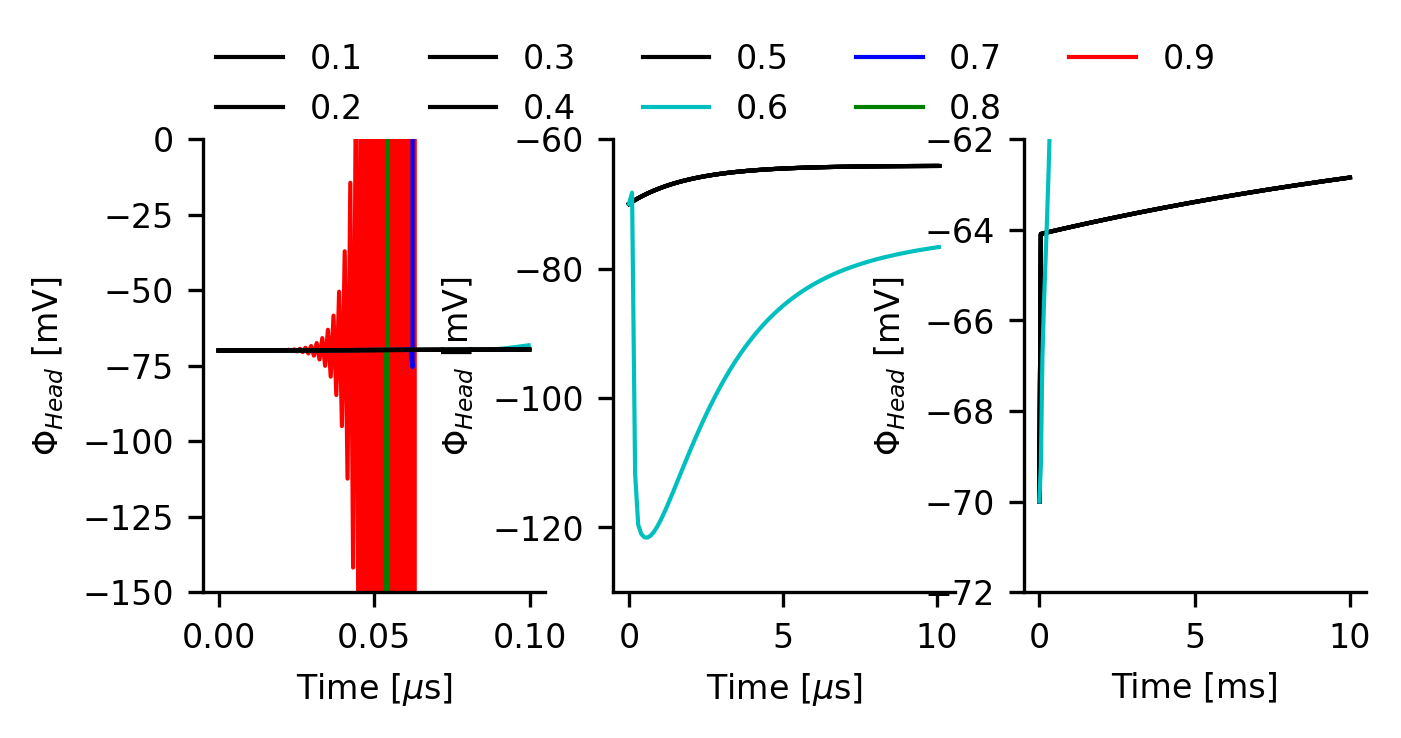

In [11]:
fig = plt.figure(dpi=300, figsize=(5,2))
ax0 = fig.add_subplot(131)
ax1 = fig.add_subplot(132)
ax2 = fig.add_subplot(133)

colors = ['k','k','k','k','k'] + ['c'] + ['b','g','r',]

t_max = 1.e-7
delta_t = (1.e-10, 1.e-11, 1.e-12, 2.e-10, 3.e-10, 4.e-10, 5.e-10, 6.e-10, 7.e-10, 8.e-10, 9.e-10, 1.e-9, 1.e-8, 1.e-10)
sub1 = [0,1,2,11,12]
sub2 = [0,3,4,5,6,7,8,9,10]

col_i = 0
for n,phi in enumerate(phi_head_inital_tdiscr):
    if n in sub2:
        t = t_initial_tdiscr[n]
        print(t[1] - t[0])
        mask = t<t_max
        t = t[mask]*1.e6
        phi_n = phi[mask,1]*1.e3

        #i = experiment_ids_short[n]
        ax0.plot(t,phi_n,lw=1,label=delta_t[n]*1.e9, color=colors[col_i], zorder=-n)
        col_i+=1
        ax0.set_ylim(-150,0)
        ax0.set_xlabel('Time [$\mu$s]', fontsize=8)
        ax0.set_ylabel('$\Phi_{Head}$ [mV]', fontsize=8)
        ax0.tick_params(labelsize=8)
        ax0.spines['top'].set_visible(False)
        ax0.spines['right'].set_visible(False)

        #ax1.plot(phi[:,1], label=i)
        #ax1.plot([len(phi[:,1])],phi[-1,1], marker = 'x') 
        #if phi[-1,1] > -0.06:
        #    print(phi[-1,1])
        #    ax2.plot([n],phi[-1,1]/phi_head[0][-1,1], marker = 'x') 
ax0.legend(loc=(0.,1.), fontsize=8, frameon=False, ncol=5)
#ax1.legend()

t_max = 10.1
for n,phi in enumerate(phi_cap_tdiscr):
    phi = phi*1.e3
    t = t_cap_tdiscr[n] * 1.e6
    mask = t < t_max
    t = t[mask]
    ax1.plot(t,phi[mask,1],color=colors[n], lw=1.)
    ax1.set_ylim(-130,-60)
    ax1.set_xlabel('Time [$\mu$s]', fontsize=8)
    ax1.set_ylabel('$\Phi_{Head}$ [mV]', fontsize=8)
    ax1.tick_params(labelsize=8)
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)


for n,phi in enumerate(phi_long_tdiscr):
    t = t_long_tdiscr[n]
    t_max = 10.e-3
    mask = t<t_max
    t = t[mask]
    phi_n = phi[mask,1]*1.e3
    c_Na = c_Na_long_tdiscr[n][mask,1]

    i = experiment_ids_long_tdiscr[n]
    print(n,i,delta_t[n],phi[-1,1]<-0.062)
    ax2.plot(t*1.e3,phi_n,lw=1,label=str(delta_t[n])+' ns', color=colors[n])
    ax2.set_ylim(-72,-62)
    #ax2.legend(fontsize=8)
    ax2.set_xlabel('Time [ms]', fontsize=8)
    ax2.set_ylabel('$\Phi_{Head}$ [mV]', fontsize=8)
    ax2.tick_params(labelsize=8)
    ax2.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)


#ax0.set_title('initial steps')
#ax1.set_title('capacitor charging')
#ax2.set_title('long run')

#ax2.set_ylim([-0.0581907,-0.0581906])
#ax2.set_yticks([-0.0581907,-0.0581906])
#ax2.set_ylabel([-0.0581907,-0.0581906])

#plt.tight_layout()
plt.show()

0 100 1e-10 True
1 103 2e-10 True
2 104 3e-10 True
3 105 4e-10 True
4 106 5e-10 True
5 107 6e-10 False
6 108 7e-10 False
7 109 8e-10 False
8 110 9e-10 False


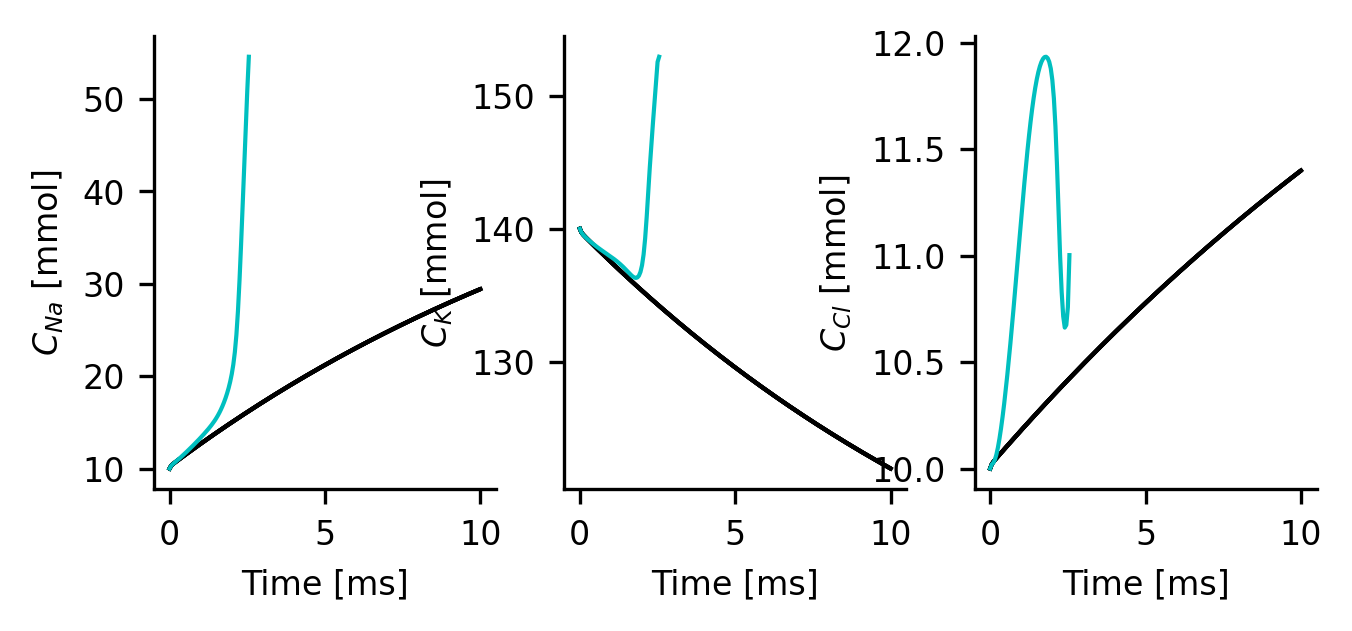

In [12]:
fig = plt.figure(dpi=300, figsize=(5,2))
ax0 = fig.add_subplot(131)
ax1 = fig.add_subplot(132)
ax2 = fig.add_subplot(133)

t_max = 10.e-3
delta_t = (1.e-10, 2.e-10, 3.e-10, 4.e-10, 5.e-10, 6.e-10, 7.e-10, 8.e-10, 9.e-10, 1.e-9, 1.e-8, 1.e-10)

for n,phi in enumerate(phi_long_tdiscr):
    t = t_long_tdiscr[n]

    mask = t<t_max
    t = t[mask]*1.e3
    phi_n = phi[mask,1]*1.e3
    c_Na = c_Na_long_tdiscr[n][mask,1]
    c_K = c_K_long_tdiscr[n][mask,1]
    c_Cl = c_Cl_long_tdiscr[n][mask,1]

    i = experiment_ids_long_tdiscr[n]
    print(n,i,delta_t[n],phi[-1,1]<-0.062)
    ax0.plot(t, c_Na, lw=1., color=colors[n],label=str(delta_t[n]*1.e9)+' ns')
    #ax0.set_ylim(-72,-62)
    #ax0.legend(fontsize=8)
    ax0.set_xlabel('Time [ms]', fontsize=8)
    ax0.set_ylabel('$C_{Na}$ [mmol]', fontsize=8)
    ax0.spines['right'].set_visible(False)
    ax0.spines['top'].set_visible(False)
    ax0.tick_params(labelsize=8)
    
    ax1.plot(t, c_K, lw=1., color=colors[n])
    ax1.set_xlabel('Time [ms]', fontsize=8)
    ax1.set_ylabel('$C_{K}$ [mmol]', fontsize=8)
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.tick_params(labelsize=8)
    
    ax2.plot(t, c_Cl, lw=1., color=colors[n])
    ax2.set_xlabel('Time [ms]', fontsize=8)
    ax2.set_ylabel('$C_{Cl}$ [mmol]', fontsize=8)
    ax2.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.tick_params(labelsize=8)
    

In [13]:
(0.85+0.63)/2.

0.74

# Figure

1
2
3
4
5
6
1.0
2.0
3.0
4.0
5.0
6.0
9.999999999999999e-11
1.9999999999999998e-10
3e-10
3.9999999999999996e-10
5e-10
6e-10
7.000000000000001e-10
7.999999999999999e-10
9e-10
0 100 1e-10 True
1 103 1e-11 True
2 104 1e-12 True
3 105 2e-10 True
4 106 3e-10 True
5 107 4e-10 False
6 108 5e-10 False
7 109 6e-10 False
8 110 7e-10 False
0 100 1e-10 True
1 103 2e-10 True
2 104 3e-10 True
3 105 4e-10 True
4 106 5e-10 True
5 107 6e-10 False
6 108 7e-10 False
7 109 8e-10 False
8 110 9e-10 False


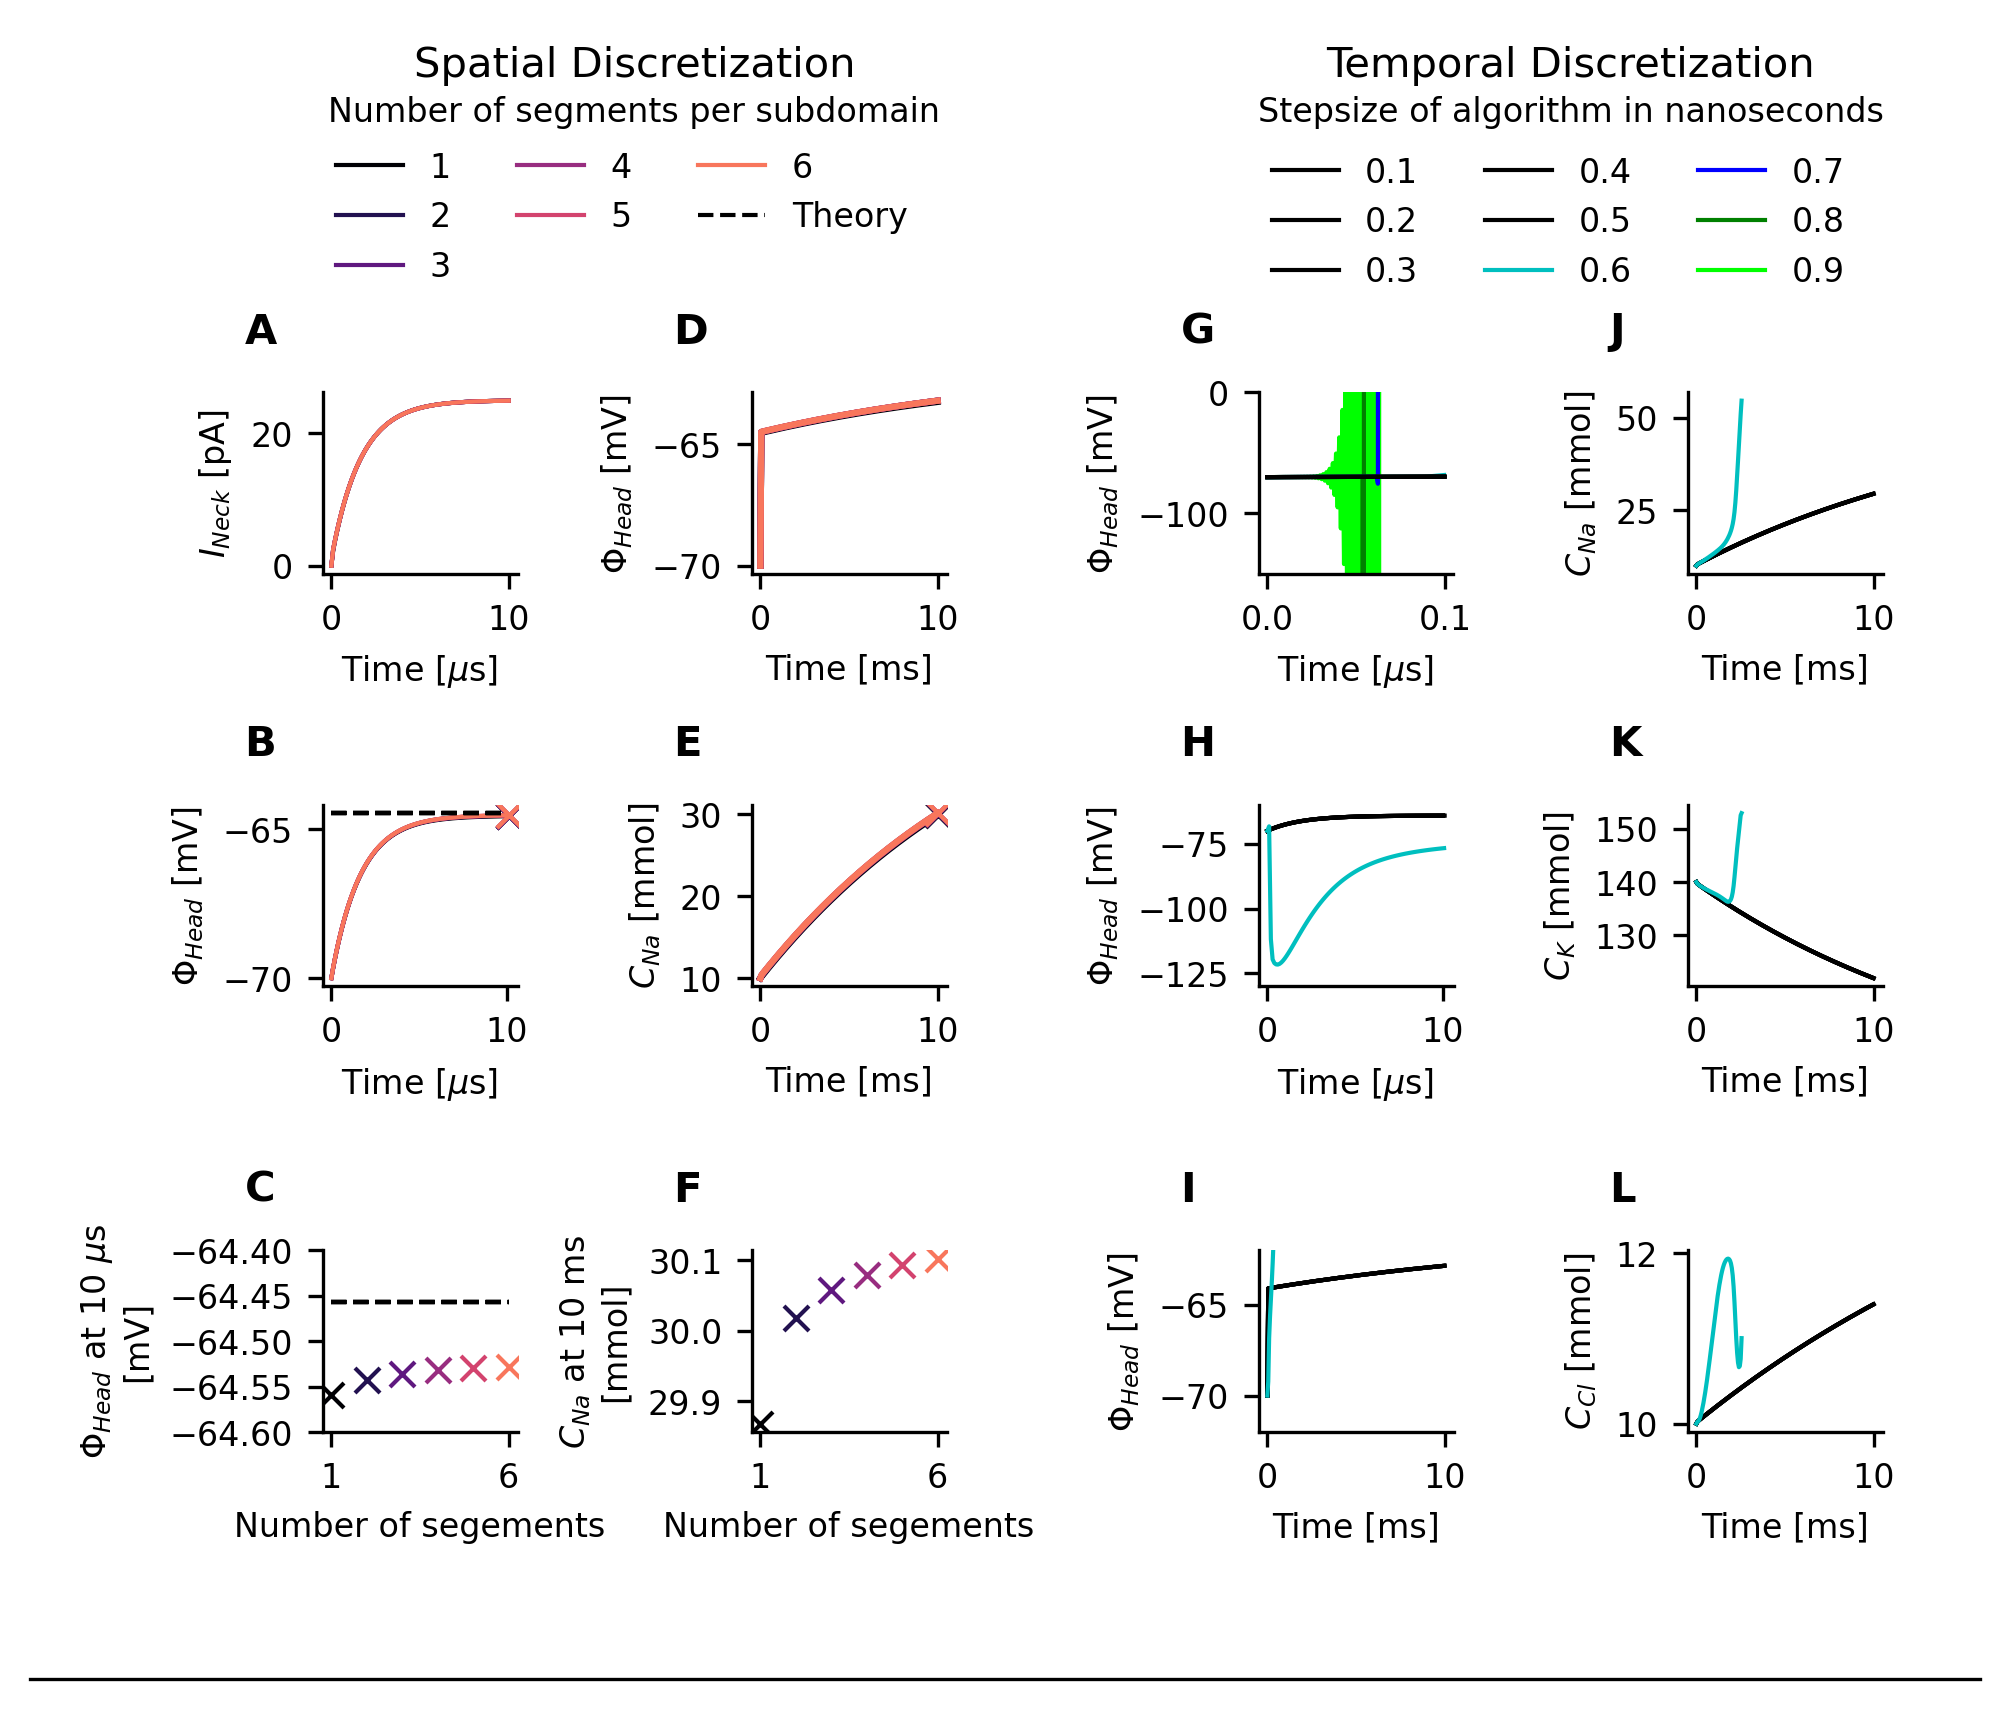

In [15]:
fig = plt.figure(dpi=300, figsize=(6.5,5.5))

frame = fig.add_axes([0,0,1,1])
frame.set_xticks(())
frame.set_yticks(())
frame.spines['top'].set_visible(False)
frame.spines['right'].set_visible(False)
frame.spines['left'].set_visible(False)

x_pos = [0.15,0.37,0.63,0.85]
y_pos = [0.67,0.42,0.15]
xw, yw = 0.1,0.11

axes = []

l = ['A','B','C',
     'D','E','F',
     'G','H','I',
     'J','K','L',
    ]


li = 0
for xi in x_pos:
    for yi in y_pos:
        ax = fig.add_axes([xi,yi,xw,yw])
        axes.append(ax)
        fig.text(xi-0.04,yi+yw+0.03,l[li], weight='bold')
        li+=1

        
fig.text(0.31,0.99,'Spatial Discretization', fontsize=10, ha='center', va='top')
fig.text(0.31,0.96,'Number of segments per subdomain', fontsize=8, ha='center', va='top')
fig.text(0.79,0.99,'Temporal Discretization', fontsize=10, ha='center', va='top')
fig.text(0.79,0.96,'Stepsize of algorithm in nanoseconds', fontsize=8, ha='center', va='top')

        
    
colors = [cmx.magma(1./7*n) for n in range(6)] 

ax0 = axes[0]
ax1 = axes[1]
ax2 = axes[2]
ti_max = 101
for n, phi in enumerate(phi_head_10mus_xdiscr):
    t = t_10mus_xdiscr[n]
    i = runs_10mus_xdiscr
    n_segments = int((np.shape(phi)[1]-2)/3)
    print(n_segments)
    i_total = i_neck_10mus_xdiscr[n]    
    g_ij = cum_resistance_10mus_xdiscr[0]
    cum_R = np.cumsum(1./g_ij, axis=1)
    v_lim = cum_R[:,-1]*i_total[ti_max,-1]+phi[0,0]
    
    
    
    #print(t)
    ax0.plot(t[:ti_max]*1.e6,i_total[:ti_max,n+1]*1.e12, color=colors[n], lw=1.)
    ax0.set_ylabel('$I_{Neck}$ [pA]', fontsize=8)
    ax0.set_xlabel('Time [$\mu$s]', fontsize=8)
    ax0.tick_params(labelsize=8)
    ax0.spines['top'].set_visible(False)
    ax0.spines['right'].set_visible(False)
    
    
    ax1.plot(t[:ti_max]*1.e6,phi[:ti_max,1]*1.e3, label=n_segments, color=colors[n], lw=1.)
    ax1.plot([t[ti_max]*1.e6],phi[ti_max,1]*1.e3, marker = 'x', color=colors[n], lw=1.) 
    if n == len(phi_head_10mus_xdiscr)-1:
        ax1.plot(t[:ti_max]*1.e6,v_lim[:ti_max]*1.e3,'k--',zorder=10, label='Theory', lw=1.)
    else: # no label
        ax1.plot(t[:ti_max]*1.e6,v_lim[:ti_max]*1.e3,'k--',zorder=10, lw=1.)
    ax1.set_ylabel('$\Phi_{Head}$ [mV]', fontsize=8)
    ax1.set_xlabel('Time [$\mu$s]', fontsize=8)
    ax1.tick_params(labelsize=8)
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)

    
    ax2.plot([1,len(phi_head_10mus_xdiscr)],[v_lim[0]*1.e3,v_lim[0]*1.e3],'k--',zorder=10, lw=1.)
    ax2.plot([n+1],phi[ti_max,1]*1.e3, marker = 'x', color=colors[n], lw=1.) 
    ax2.set_ylabel('$\Phi_{Head}$ at 10 $\mu$s\n[mV]', fontsize=8)
    ax2.set_xlabel('Number of segements', fontsize=8)
    ax2.tick_params(labelsize=8)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.set_ylim(-64.6, -64.4)
    ax2.set_xticks([1,6])
    
    
ax1.legend(fontsize=8, ncol=3, loc=(0.,3.8), frameon=False)    


#######################################
# SECOND COLUMN

ax0 = axes[3]
ax1 = axes[4]
ax2 = axes[5]


for n, phi in enumerate(phi_head_10ms_xdiscr):
    i = runs_10ms_xdiscr
    n_segments = (np.shape(phi)[1]-2)/3
    print(n_segments)
    t = t_10ms_xdiscr[n]
    c_Na = c_Na_10ms_xdiscr[n]
    c_K = c_K_10ms_xdiscr[n]
    c_Cl = c_Cl_10ms_xdiscr[n]

    
    ax0.plot(t*1.e3,phi[:,1]*1.e3, color=colors[n])
    ax0.set_ylabel('$\Phi_{Head}$ [mV]', fontsize=8)
    ax0.set_xlabel('Time [ms]', fontsize=8)
    ax0.tick_params(labelsize=8)
    ax0.spines['top'].set_visible(False)
    ax0.spines['right'].set_visible(False)
    
    
    ax1.plot(t*1.e3,c_Na[:,1], color=colors[n])
    ax1.plot(t[-1]*1.e3,c_Na[-1,1], color=colors[n],marker='x')
    ax1.set_ylabel('$C_{Na}$ [mmol]', fontsize=8)
    ax1.set_xlabel('Time [ms]', fontsize=8)
    ax1.tick_params(labelsize=8)
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    
    ax2.plot([n_segments],[c_Na[-1,1]],marker='x', color=colors[n])
    ax2.set_ylabel('$C_{Na}$ at 10 ms\n[mmol]', fontsize=8)
    ax2.set_xlabel('Number of segements', fontsize=8)
    ax2.tick_params(labelsize=8)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.set_xticks([1,6])
    
#######################################
# 3RD COLUMN

ax0 = axes[6]
ax1 = axes[7]
ax2 = axes[8]

colors = ['k','k','k','k','k'] + ['c'] + ['b','g','lime',]

t_max = 1.e-7
delta_t = (1.e-10, 1.e-11, 1.e-12, 2.e-10, 3.e-10, 4.e-10, 5.e-10, 6.e-10, 7.e-10, 8.e-10, 9.e-10, 1.e-9, 1.e-8, 1.e-10)
sub1 = [0,1,2,11,12]
sub2 = [0,3,4,5,6,7,8,9,10]

col_i = 0
for n,phi in enumerate(phi_head_inital_tdiscr):
    if n in sub2:
        t = t_initial_tdiscr[n]
        print(t[1] - t[0])
        mask = t<t_max
        t = t[mask]*1.e6
        phi_n = phi[mask,1]*1.e3

        #i = experiment_ids_short[n]
        ax0.plot(t,phi_n,lw=1,label=delta_t[n]*1.e9, color=colors[col_i], zorder=-n)
        col_i+=1
        ax0.set_ylim(-150,0)
        ax0.set_xlabel('Time [$\mu$s]', fontsize=8)
        ax0.set_ylabel('$\Phi_{Head}$ [mV]', fontsize=8)
        ax0.tick_params(labelsize=8)
        ax0.spines['top'].set_visible(False)
        ax0.spines['right'].set_visible(False)

        #ax1.plot(phi[:,1], label=i)
        #ax1.plot([len(phi[:,1])],phi[-1,1], marker = 'x') 
        #if phi[-1,1] > -0.06:
        #    print(phi[-1,1])
        #    ax2.plot([n],phi[-1,1]/phi_head[0][-1,1], marker = 'x') 
ax0.legend(fontsize=8, ncol=3, loc=(0.,1.5), frameon=False)    
#ax1.legend()

t_max = 10.1
for n,phi in enumerate(phi_cap_tdiscr):
    phi = phi*1.e3
    t = t_cap_tdiscr[n] * 1.e6
    mask = t < t_max
    t = t[mask]
    ax1.plot(t,phi[mask,1],color=colors[n], lw=1.)
    ax1.set_ylim(-130,-60)
    ax1.set_xlabel('Time [$\mu$s]', fontsize=8)
    ax1.set_ylabel('$\Phi_{Head}$ [mV]', fontsize=8)
    ax1.tick_params(labelsize=8)
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)


for n,phi in enumerate(phi_long_tdiscr):
    t = t_long_tdiscr[n]
    t_max = 10.e-3
    mask = t<t_max
    t = t[mask]
    phi_n = phi[mask,1]*1.e3
    c_Na = c_Na_long_tdiscr[n][mask,1]

    i = experiment_ids_long_tdiscr[n]
    print(n,i,delta_t[n],phi[-1,1]<-0.062)
    ax2.plot(t*1.e3,phi_n,lw=1,label=str(delta_t[n])+' ns', color=colors[n])
    ax2.set_ylim(-72,-62)
    #ax2.legend(fontsize=8)
    ax2.set_xlabel('Time [ms]', fontsize=8)
    ax2.set_ylabel('$\Phi_{Head}$ [mV]', fontsize=8)
    ax2.tick_params(labelsize=8)
    ax2.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)


#######################################
# 4TH COLUMN

ax0 = axes[9]
ax1 = axes[10]
ax2 = axes[11]

t_max = 10.e-3
delta_t = (1.e-10, 2.e-10, 3.e-10, 4.e-10, 5.e-10, 6.e-10, 7.e-10, 8.e-10, 9.e-10, 1.e-9, 1.e-8, 1.e-10)

for n,phi in enumerate(phi_long_tdiscr):
    t = t_long_tdiscr[n]

    mask = t<t_max
    t = t[mask]*1.e3
    phi_n = phi[mask,1]*1.e3
    c_Na = c_Na_long_tdiscr[n][mask,1]
    c_K = c_K_long_tdiscr[n][mask,1]
    c_Cl = c_Cl_long_tdiscr[n][mask,1]

    i = experiment_ids_long_tdiscr[n]
    print(n,i,delta_t[n],phi[-1,1]<-0.062)
    ax0.plot(t, c_Na, lw=1., color=colors[n],label=str(delta_t[n]*1.e9)+' ns')
    #ax0.set_ylim(-72,-62)
    #ax0.legend(fontsize=8)
    ax0.set_xlabel('Time [ms]', fontsize=8)
    ax0.set_ylabel('$C_{Na}$ [mmol]', fontsize=8)
    ax0.spines['right'].set_visible(False)
    ax0.spines['top'].set_visible(False)
    ax0.tick_params(labelsize=8)
    
    ax1.plot(t, c_K, lw=1., color=colors[n])
    ax1.set_xlabel('Time [ms]', fontsize=8)
    ax1.set_ylabel('$C_{K}$ [mmol]', fontsize=8)
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.tick_params(labelsize=8)
    
    ax2.plot(t, c_Cl, lw=1., color=colors[n])
    ax2.set_xlabel('Time [ms]', fontsize=8)
    ax2.set_ylabel('$C_{Cl}$ [mmol]', fontsize=8)
    ax2.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.tick_params(labelsize=8)


plt.savefig('./../../../PaperSpineElectrodiffusion/figures/cable/FigureS1.eps')
plt.savefig('./../../../PaperSpineElectrodiffusion/figures/cable/FigureS1.png')
plt.savefig('./../../../PaperSpineElectrodiffusion/figures/cable/FigureS1.tif')


plt.show()

